In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 9.1.

In [65]:
data = [1045, 1055, 1037, 1064, 1095, 1008, 1050, 1087, 1125, 1146,
        1139, 1169, 1151, 1128, 1238, 1125, 1163, 1188, 1146, 1167]

In [66]:
target = 1050
sigma = 25
shift = 1.0
k = shift * sigma / 2
H = 5 * sigma

In [76]:
# CUSUM 변수
S_pos = [0]
S_neg = [0]

for x in data:
  S_pos.append(max(0, x - (target+k) + S_pos[-1]))
  S_neg.append(max(0, (target-k) - x + S_neg[-1]))

S_pos = S_pos[1:]
S_neg = S_neg[1:]

print(S_pos)
print(S_neg)

[0, 0, 0, 1.5, 34.0, 0, 0, 24.5, 87.0, 170.5, 247.0, 353.5, 442.0, 507.5, 683.0, 745.5, 846.0, 971.5, 1055.0, 1159.5]
[0, 0, 0.5, 0, 0, 29.5, 17.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


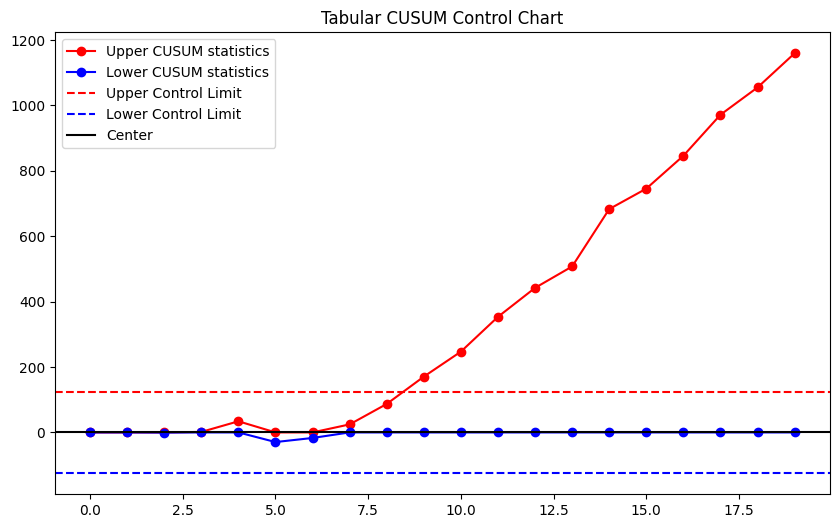

In [80]:
# CUSUM 차트
plt.figure(figsize=(10, 6))
plt.plot(np.array(S_pos), marker = 'o', color = 'r', label='Upper CUSUM statistics')
plt.plot(-np.array(S_neg), marker = 'o', color = 'b', label='Lower CUSUM statistics')
plt.axhline(H, color='red', linestyle='--', label='Upper Control Limit')
plt.axhline(-H, color='blue', linestyle='--', label = 'Lower Control Limit')
plt.axhline(0, color='black', label = 'Center')
plt.title('Tabular CUSUM Control Chart')
plt.legend()
plt.show()
# 리스트의 인덱스를 기준으로 x축이 형성되므로, period 1에 대한 데이터는 그래프 상 x값이 0일 때로 출력된다.

In [59]:
# Check the first "out of control" period
for period, S_p in zip(np.arange(20)+1, S_pos):
  if S_p > H:
    print(f'First "out of control" at period {period}')
    break

First "out of control" at period 10


### 9.2.

In [81]:
standard_data = (np.array(data) - target) / sigma
standard_data

array([-0.2 ,  0.2 , -0.52,  0.56,  1.8 , -1.68,  0.  ,  1.48,  3.  ,
        3.84,  3.56,  4.76,  4.04,  3.12,  7.52,  3.  ,  4.52,  5.52,
        3.84,  4.68])

In [85]:
# Standard CUSUM 변수
S_standard_pos = [0]
S_standard_neg = [0]

for x in standard_data:
  S_standard_pos.append(max(0, x - (0+0.5) + S_standard_pos[-1]))
  S_standard_neg.append(max(0, (0-0.5) - x + S_standard_neg[-1]))

S_standard_pos = S_standard_pos[1:]
S_standard_neg = S_standard_neg[1:]

print(S_standard_pos)
print(S_standard_neg)

[0, 0, 0, 0.06000000000000005, 1.36, 0, 0, 0.98, 3.48, 6.82, 9.88, 14.14, 17.68, 20.3, 27.32, 29.82, 33.84, 38.86, 42.2, 46.38]
[0, 0, 0.020000000000000018, 0, 0, 1.18, 0.6799999999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


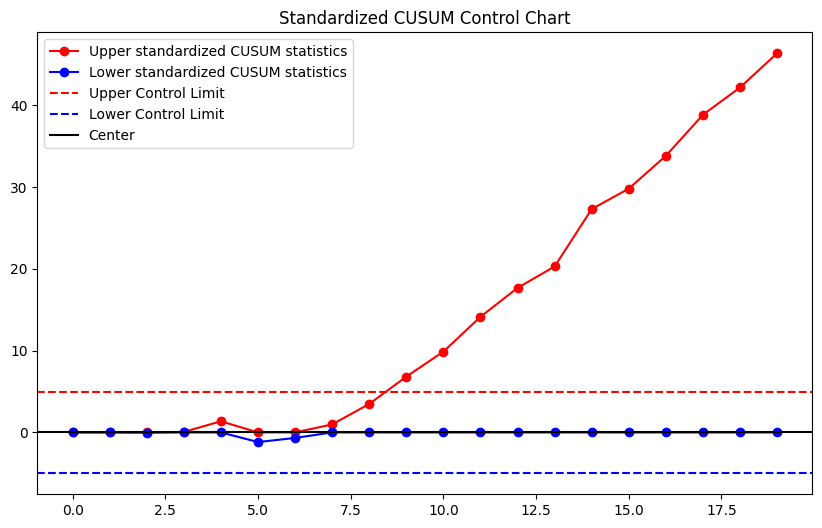

In [86]:
# CUSUM 차트
plt.figure(figsize=(10, 6))
plt.plot(np.array(S_standard_pos), marker = 'o', color = 'r', label='Upper standardized CUSUM statistics')
plt.plot(-np.array(S_standard_neg), marker = 'o', color = 'b', label='Lower standardized CUSUM statistics')
plt.axhline(5, color='red', linestyle='--', label='Upper Control Limit')
plt.axhline(-5, color='blue', linestyle='--', label = 'Lower Control Limit')
plt.axhline(0, color='black', label = 'Center')
plt.title('Standardized CUSUM Control Chart')
plt.legend()
plt.show()
# 리스트의 인덱스를 기준으로 x축이 형성되므로, period 1에 대한 데이터는 그래프 상 x값이 0일 때로 출력된다.

### 9.25.

In [26]:
lambda_ = 0.1
L = 2.7

In [34]:
# EWMA
ewma = [1050]
for x in range(len(data)):
  ewma.append(lambda_ * data[x] + (1-lambda_) * ewma[-1])

ewma = ewma[1:]
print(ewma)

[1049.5, 1050.0500000000002, 1048.7450000000001, 1050.2705, 1054.74345, 1050.069105, 1050.0621945, 1053.75597505, 1060.880377545, 1069.3923397905, 1076.3531058114502, 1085.6177952303053, 1092.1560157072747, 1095.7404141365473, 1109.9663727228926, 1111.4697354506034, 1116.622761905543, 1123.7604857149888, 1125.98443714349, 1130.085993429141]


In [40]:
# Control Limit
UCL = [target + L * sigma * np.sqrt((lambda_ / (2 - lambda_)) * (1 - (1 - lambda_)**(2 * (i + 1)))) for i in range(len(data))]
LCL = [target - L * sigma * np.sqrt((lambda_ / (2 - lambda_)) * (1 - (1 - lambda_)**(2 * (i + 1)))) for i in range(len(data))]

print(UCL)
print(LCL)

[1056.75, 1059.0811962317748, 1060.6000793039486, 1061.686550466776, 1062.4975447215893, 1063.1177469671884, 1063.5993926794947, 1063.9773645517812, 1064.2761879732948, 1064.5137255682187, 1064.7033182035332, 1064.8551145608985, 1064.9769418500612, 1065.07490025227, 1065.1537823750004, 1065.2173771530374, 1065.2686947578504, 1065.3101359263335, 1065.3436212247004, 1065.370690841746]
[1043.25, 1040.9188037682252, 1039.3999206960514, 1038.313449533224, 1037.5024552784107, 1036.8822530328116, 1036.4006073205053, 1036.0226354482188, 1035.7238120267052, 1035.4862744317813, 1035.2966817964668, 1035.1448854391015, 1035.0230581499388, 1034.92509974773, 1034.8462176249996, 1034.7826228469626, 1034.7313052421496, 1034.6898640736665, 1034.6563787752996, 1034.629309158254]


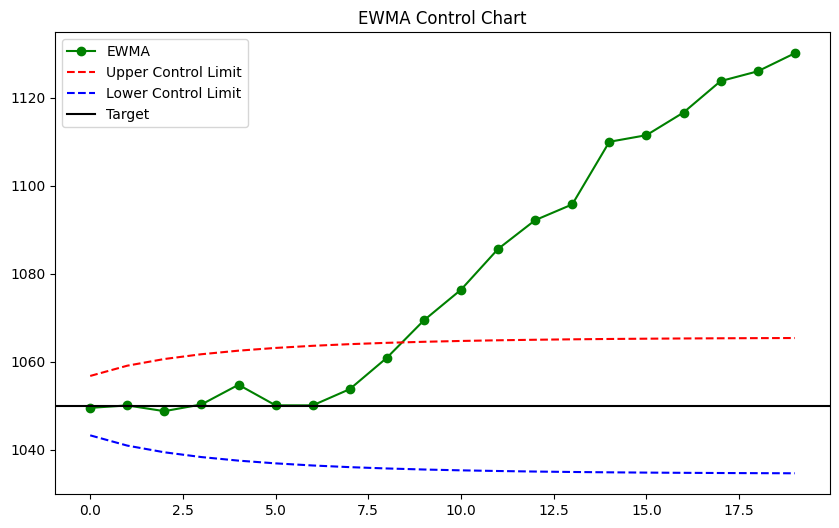

In [44]:
# EWMA 차트
plt.figure(figsize=(10, 6))
plt.plot(ewma, label='EWMA', marker = 'o', color='green')
plt.plot(UCL, label='Upper Control Limit', color='red', linestyle='--')
plt.plot(LCL, label='Lower Control Limit', color='blue', linestyle='--')
plt.axhline(1050, color='black', label='Target')
plt.title('EWMA Control Chart')
plt.legend()
plt.show()
# 리스트의 인덱스를 기준으로 x축이 형성되므로, period 1에 대한 데이터는 그래프 상 x값이 0일 때로 출력된다.

### 9.26.

In [48]:
target = 10
sigma = 1

In [49]:
lambda_ = 0.1
L = 3

UCL = target + L * sigma * np.sqrt(lambda_ / (2 - lambda_))
LCL = target - L * sigma * np.sqrt(lambda_ / (2 - lambda_))

print(UCL)
print(LCL)

10.688247201611686
9.311752798388314


In [50]:
lambda_ = 0.2
L = 3

UCL = target + L * sigma * np.sqrt(lambda_ / (2 - lambda_))
LCL = target - L * sigma * np.sqrt(lambda_ / (2 - lambda_))

print(UCL)
print(LCL)

11.0
9.0


In [51]:
lambda_ = 0.4
L = 3

UCL = target + L * sigma * np.sqrt(lambda_ / (2 - lambda_))
LCL = target - L * sigma * np.sqrt(lambda_ / (2 - lambda_))

print(UCL)
print(LCL)

11.5
8.5
